In [ ]:
import sys
sys.path.append('..')

from src.core import ECGData
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## write a function that converts a EDF into a numpy array

## Loading in Apple Watch Data
The apple watch data is stored in a .csv file. The data is loaded into a pandas dataframe and the first 10 rows are removed, and the rest is the juicy signal to which we convert and export into a numpy array.

In [ ]:
from src.core import ECGData
apple_watch_ecg = ECGData(file_path='../data/csv/apple_watch/ecg_2023-09-28.csv')
apple_watch_ecg.lead_1.r_plot()

In [ ]:
from src.core import ECGData
apple_watch_ecg = ECGData(file_path='../data/csv/apple_watch/ecg_2021-12-17.csv')
apple_watch_ecg.lead_1.p_plot()

In [ ]:
### plot the signal and the phasor plot
from src.core import ECGData
apple_watch_ecg = ECGData(file_path='../data/csv/apple_watch/ecg_2021-12-17.csv')

plt.figure(figsize=(20,10))
plt.plot(apple_watch_ecg.lead_1.signal, label='Signal')
plt.plot(apple_watch_ecg.lead_1.phasor/10, label='Phasor')
## ADD A LINE FOR y = 0
plt.axhline(y=0, color='r', linestyle='--')
plt.title('ECG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

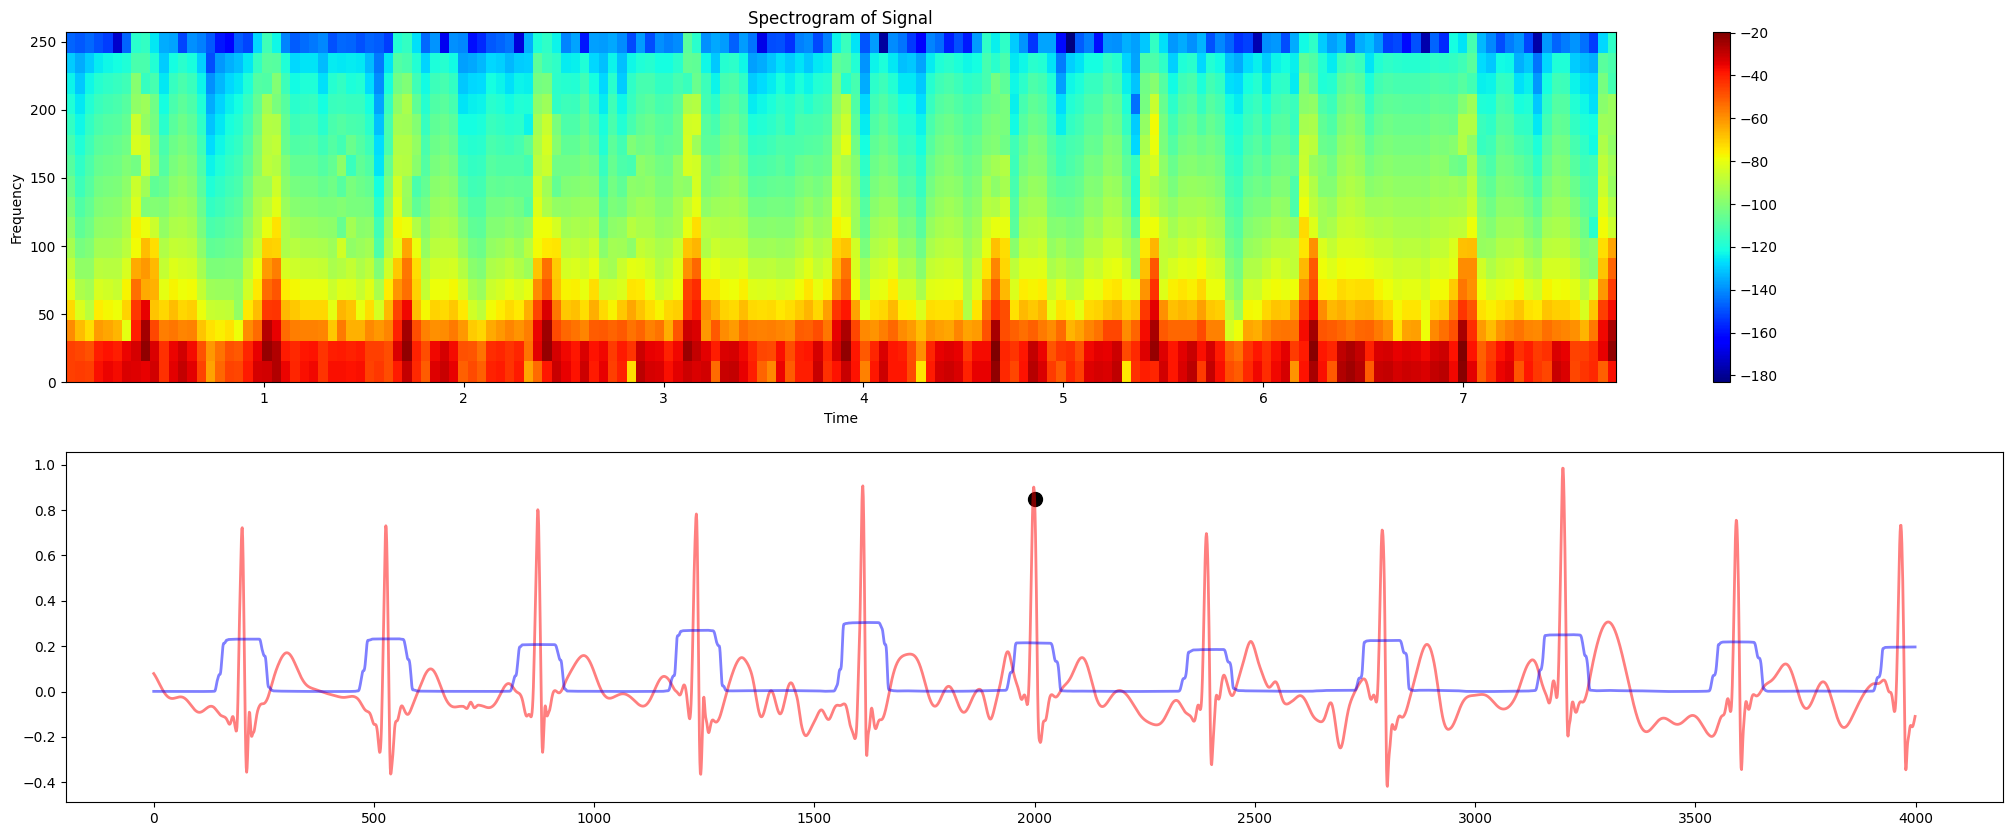

In [6]:
noise = apple_watch_ecg.lead_1.r_peaks[:,0][np.argmax(apple_watch_ecg.lead_1.r_peaks[:,1])]
t = noise
plt.figure(figsize=(25, 10))

# First subplot
plt.subplot(2, 1, 1)
plt.specgram(apple_watch_ecg.lead_1.signal[t-2000:t+2000], Fs=apple_watch_ecg.fs, NFFT=32, noverlap=8, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Spectrogram of Signal')

plt.subplot(2, 1, 2)
plt.plot(apple_watch_ecg.lead_1.signal[t-2000:t+2000], 'r', linewidth=2, alpha=0.5,label='Mean Signal')
plt.plot(apple_watch_ecg.lead_1.window[t-2000:t+2000], 'b', linewidth=2, alpha=0.5,label='Mean Signal')
plt.scatter(2000, apple_watch_ecg.lead_1.signal[t], s=100, c='k', marker='o', label='R Peak')

plt.show()


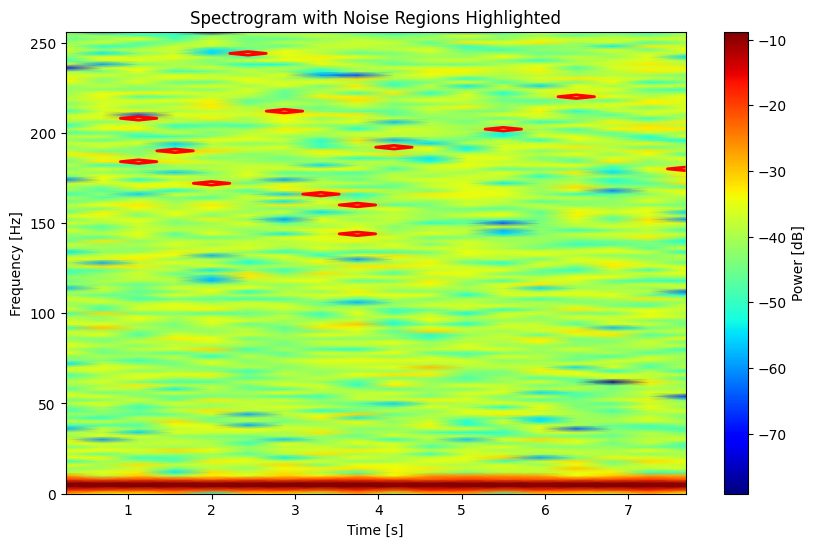

Regions with Noise Detected at Times: [1.125  1.5625 2.     2.4375 2.875  3.3125 3.75   4.1875 5.5    6.375
 7.6875]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Simulated Signal (Replace this with your own ECG signal array)
fs = 512  # Sampling frequency in Hz
t = np.linspace(0, 8, fs * 8)  # 8-second duration
signal = np.sin(2 * np.pi * 5 * t) + np.random.normal(0, 0.2, len(t))  # Add some noise

# Compute Spectrogram
frequencies, times, Sxx = spectrogram(signal, fs=fs, nperseg=256)

# Define Noise Criteria
freq_threshold = 100  # Frequency above which noise is considered
power_threshold = np.percentile(Sxx, 95)  # Top 5% power as noise threshold

# Find Regions with Noise
noise_mask = (frequencies[:, None] > freq_threshold) & (Sxx > power_threshold)

# Plot Spectrogram with Noise Highlighted
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='jet')
plt.colorbar(label='Power [dB]')
plt.title('Spectrogram with Noise Regions Highlighted')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

# Highlight Noisy Regions
plt.contour(times, frequencies, noise_mask, levels=[0.5], colors='red', linewidths=2)
plt.show()

# Optional: Extract Noise Indices
noise_times = times[np.any(noise_mask, axis=0)]
print(f"Regions with Noise Detected at Times: {noise_times}")

In [8]:
## We add the arrays together and sort it, where we have arrays that are similar we eliminate the one from the p_peaks

common = np.sort((np.concatenate((apple_watch_ecg.lead_1.r_peaks[:,0], apple_watch_ecg.lead_1.p_peaks[:,0]))))
common

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [9]:
unique = np.where(np.diff(common) < 10)[0]
add_1 = unique + 1
new = np.sort((np.array((unique, add_1))).flatten())
new_common = np.delete(common, new)
## by definition the p_peaks are before the r_peaks, and the T_peaks are after the r_peaks
## so we define the T_peaks as the peaks occuring after the ones we have removed
new_common

NameError: name 'common' is not defined

In [10]:
new_common

NameError: name 'new_common' is not defined

In [11]:
unique.shape,apple_watch_ecg.lead_1.r_peaks[:,0].shape

NameError: name 'unique' is not defined

NameError: name 'new_common' is not defined

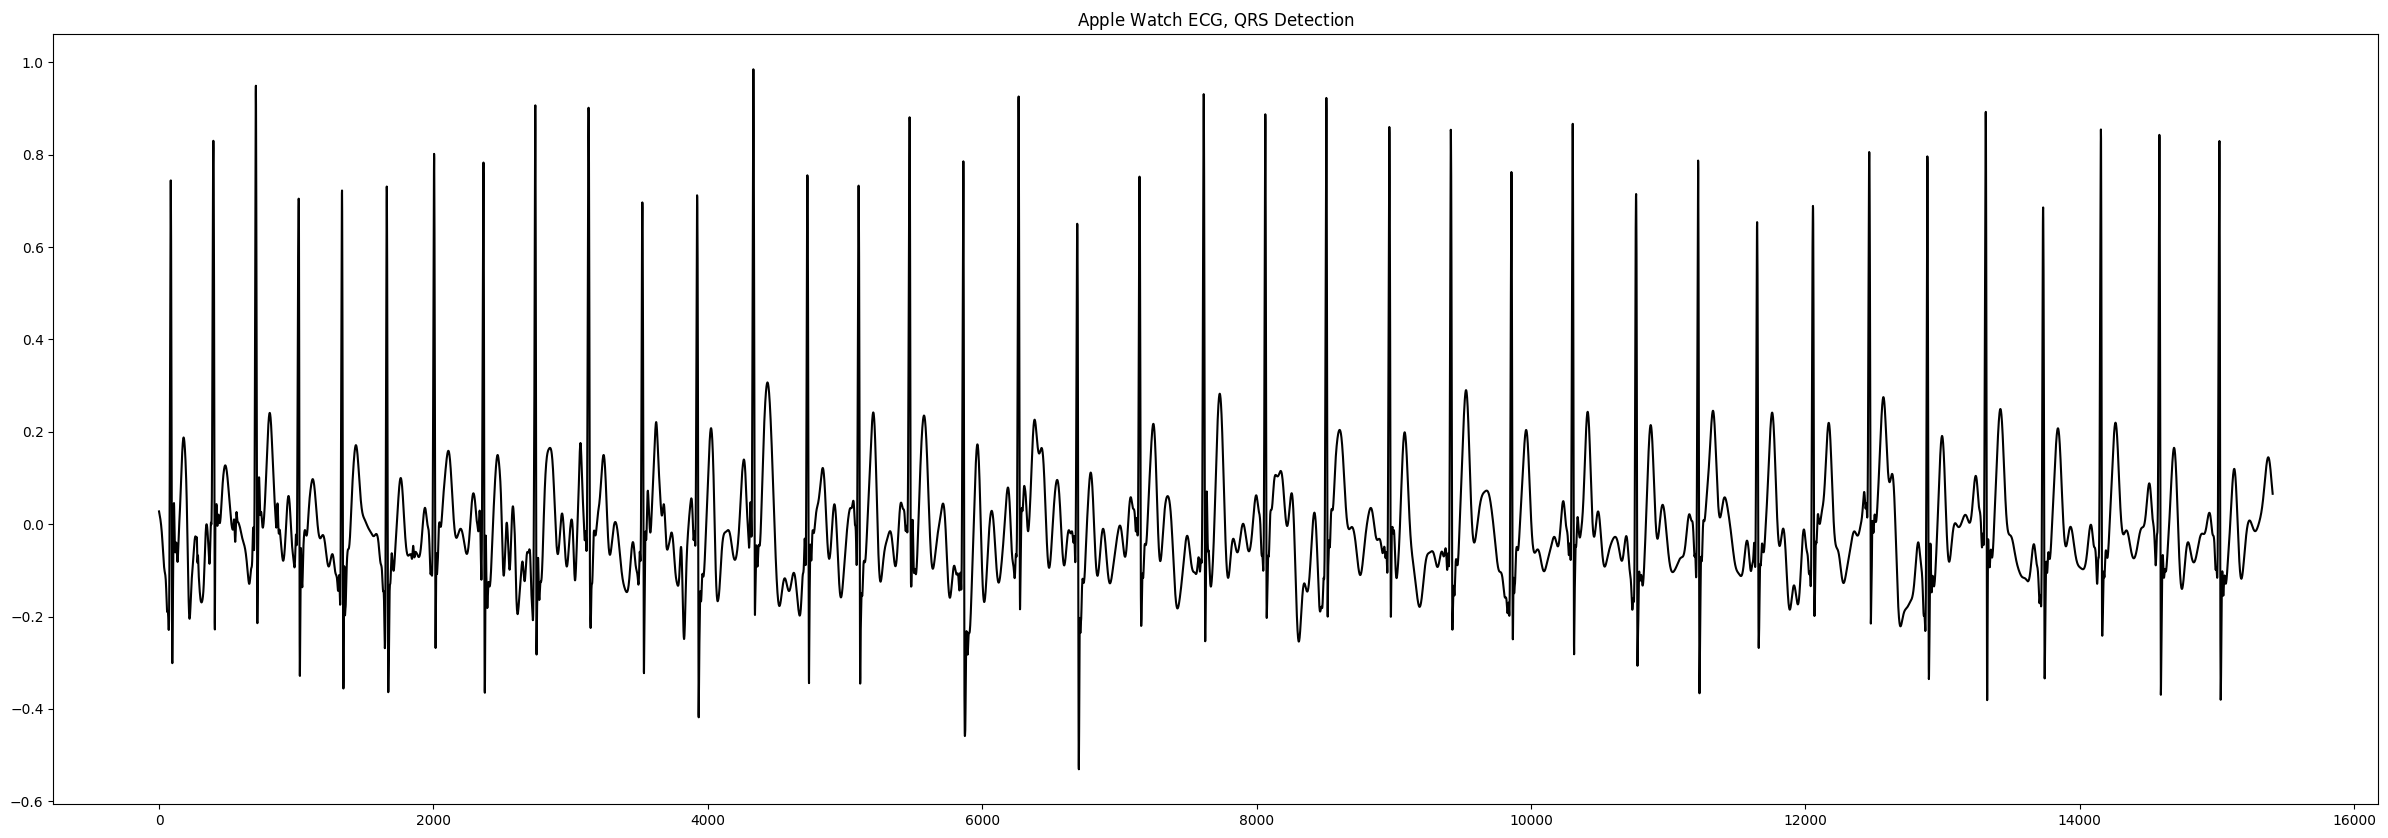

In [12]:
plt.figure(figsize=(30,10))
plt.title(r'$\text{Apple Watch ECG, QRS Detection}$')
plt.plot(apple_watch_ecg.lead_1.signal,label=r'$\text{apple_watch_ecg.lead_1 1}$',c='black')
plt.scatter(new_common,apple_watch_ecg.lead_1.signal[new_common],c='r',label=r'$\text{R Peaks, N = '+str(len(apple_watch_ecg.lead_1.r_peaks))+'}$')
plt.xlabel(r'$\text{Samples (n)}$')
plt.ylabel(r'$\text{Voltage (uV)}$')
plt.legend(title=r'$'+str(apple_watch_ecg.lead_1.bpm)+'$' + r'$\text{ BPM}$')
plt.show()


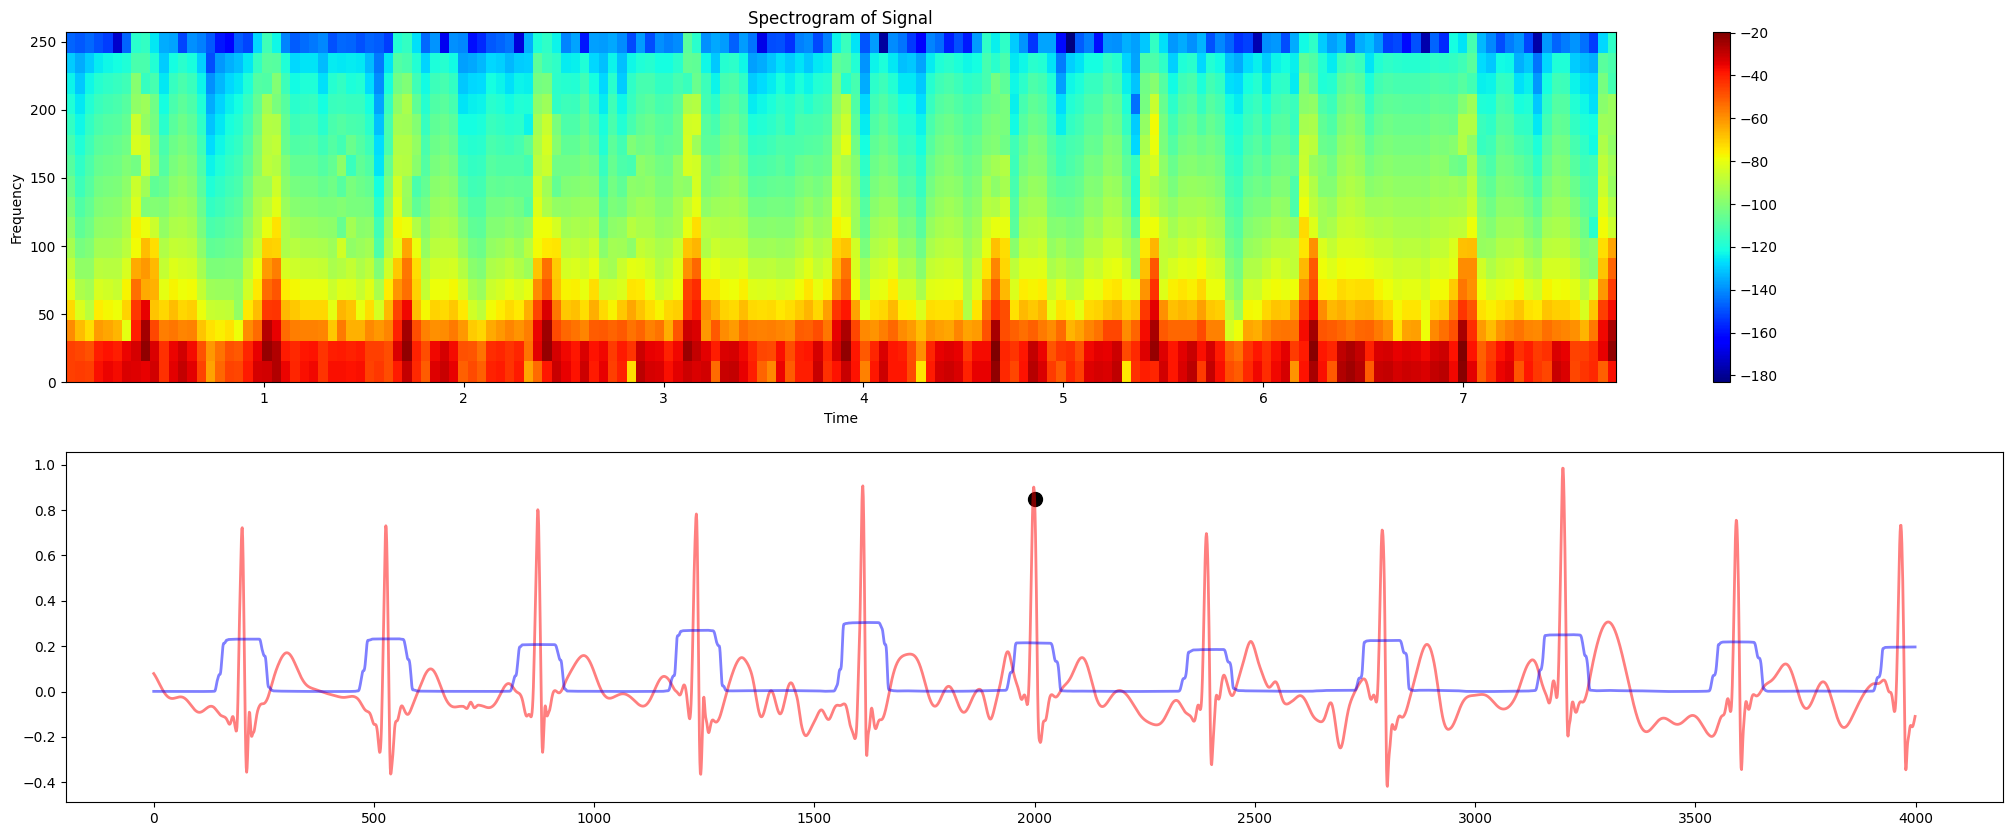

In [ ]:
noise = apple_watch_ecg.lead_1.r_peaks[:,0][np.argmax(apple_watch_ecg.lead_1.r_peaks[:,1])]
t = noise
plt.figure(figsize=(25, 10))

# First subplot
plt.subplot(2, 1, 1)
plt.specgram(apple_watch_ecg.lead_1.signal[t-2000:t+2000], Fs=apple_watch_ecg.fs, NFFT=32, noverlap=8, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Spectrogram of Signal')

plt.subplot(2, 1, 2)
plt.plot(apple_watch_ecg.lead_1.signal[t-2000:t+2000], 'r', linewidth=2, alpha=0.5,label='Mean Signal')
plt.plot(apple_watch_ecg.lead_1.window[t-2000:t+2000], 'b', linewidth=2, alpha=0.5,label='Mean Signal')
plt.scatter(2000, apple_watch_ecg.lead_1.signal[t], s=100, c='k', marker='o', label='R Peak')

plt.show()


In [ ]:
## 3D Vectorcardiography

# Load the data
ecg_data = ECGData(file_path='../data/npz/sample_ecg.npz')